In [20]:
import requests # 웹 페이지 소스를 얻기 위한 패키지(기본 내장 패키지이다.)
from bs4 import BeautifulSoup # 웹 페이지 소스를 얻기 위한 패키지, 더 간단히 얻을 수 있다는 장점이 있다고 한다.
from datetime import datetime                                # (!pip install beautifulsoup4 으로 다운받을 수 있다.)
import pandas as pd # 데이터를 처리하기 위한 가장 기본적인 패키지
import time # 사이트를 불러올 때, 작업 지연시간을 지정해주기 위한 패키지이다. (사이트가 늦게 켜지면 에러가 발생하기 때문)
import urllib.request #
from selenium.webdriver import Chrome
import json
import re     
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import datetime as dt
import os
import glob
from pandas import DataFrame


import matplotlib as mpl
import matplotlib.pylab as plt

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc('font',family = font_name)

In [2]:
# r1 = pd.read_csv('dongjun_IT20/result.csv', index_col = '날짜')

# r1[r1["댓글"].str.contains("아이폰")]
# # r1["댓글"].str.contains("아이폰")

,닉네임,댓글,좋아요수
날짜,,,
['2020. 5. 21.'],jang2014,아이폰에 boe가 탑재되려면 애플의 검수를 통과해야함 탑재되도 걱정없음,1개
['2020. 5. 20.'],웰시코기,사진을 보고\n아이폰8 그리고 아이폰Se와 다른점은......\n거의 없습니다 다만...,1개
['2020. 5. 19.'],이승훈,아이폰SE 컬러 진짜 잘 빠졌ㅇㅓ요!,1개
['2020. 5. 19.'],전지훈,근데 아이폰 se중고로 판매할려면 언제 파는게 좋을까요?,1개
['2020. 5. 12.'],LHML,아이폰12pro정말 갖고싶다 아이폰답지않은 6기가 램에 128기가 부터 시작한다니 ...,1개
['2020. 5. 11.'],조예찬,"2:27 아이폰 11, 11pro, 11pro max 인치 오타 난 거 같아용",1개
['2020. 5. 11.'],놀공하는중2,아이폰 se2로 아걸 보는 내 인생이 레전드,1개
['2020. 5. 5.'],시리,민서야 내 아이폰 수리비 갚아라 산지 얼마 안 된 1개월 된 새삥 이였다 인간아 니...,0개
['2020. 5. 27.'],동키,통화 녹음이랑 애플페이만 정말 된다면\n아이폰 안 쓸 이유가 없군요 \n만년 앱등이...,1개


In [3]:
# r1["count"] = r1["댓글"].str.contains("아이폰")
# r1

,닉네임,댓글,좋아요수,count
날짜,,,,
['2020. 5. 31.'],노을빛창가,0:10 서티는 30,2개,False
['2020. 5. 31.'],아름다운갤워치액티브,아냐 안찾았어 다시 들어가 내눈썩어,2개,False
['2020. 5. 31.'],웰시코기,아 내누 아..내눈..아ㅏㅏㅏㅏㅏㅏ내눈!,1개,False
['2020. 5. 31.'],월리,13에서 포트 싹다 없앤다는 말이 계속 들려서 불안....,1개,False
['2020. 5. 31.'],이정호,네이비블루 되게 고급스럽고 이쁜거같아용,1개,False
...,...,...,...,...
['2020. 5. 22.'],109이승엽25번,까비...2빠,1개,False
['2020. 5. 22.'],월리,아이폰에 소니센서는 원래 안들어갔었나요?,1개,True
['2020. 5. 22.'],109이승엽25번,"일본,중국에서 만든 카메라여도 11보다는 좋은거겠죠?",1개,False


In [4]:
# list1 = np.array(r1["댓글"].str.contains("아이폰"))
# list1*1
# r1["count2"] = list1*1
# r1

,닉네임,댓글,좋아요수,count,count2
날짜,,,,,
['2020. 5. 31.'],노을빛창가,0:10 서티는 30,2개,False,0
['2020. 5. 31.'],아름다운갤워치액티브,아냐 안찾았어 다시 들어가 내눈썩어,2개,False,0
['2020. 5. 31.'],웰시코기,아 내누 아..내눈..아ㅏㅏㅏㅏㅏㅏ내눈!,1개,False,0
['2020. 5. 31.'],월리,13에서 포트 싹다 없앤다는 말이 계속 들려서 불안....,1개,False,0
['2020. 5. 31.'],이정호,네이비블루 되게 고급스럽고 이쁜거같아용,1개,False,0
...,...,...,...,...,...
['2020. 5. 22.'],109이승엽25번,까비...2빠,1개,False,0
['2020. 5. 22.'],월리,아이폰에 소니센서는 원래 안들어갔었나요?,1개,True,1
['2020. 5. 22.'],109이승엽25번,"일본,중국에서 만든 카메라여도 11보다는 좋은거겠죠?",1개,False,0


In [12]:

pdf=r1.pivot_table("count2", "날짜", aggfunc="sum")
pdf

,count2
날짜,
['2020. 5. 1.'],0
['2020. 5. 11.'],2
['2020. 5. 12.'],1
['2020. 5. 14.'],0
['2020. 5. 19.'],2
['2020. 5. 20.'],1
['2020. 5. 21.'],1
['2020. 5. 22.'],2
['2020. 5. 24.'],2


In [5]:
# r1.pivot_table("count", "날짜", aggfunc="count")

,count
날짜,
['2020. 5. 1.'],10
['2020. 5. 11.'],7
['2020. 5. 12.'],13
['2020. 5. 14.'],7
['2020. 5. 19.'],7
['2020. 5. 20.'],11
['2020. 5. 21.'],8
['2020. 5. 22.'],5
['2020. 5. 24.'],10


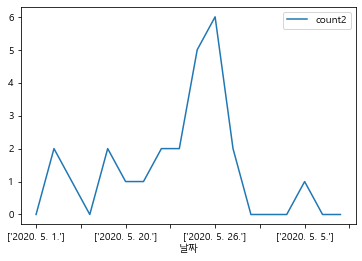

In [13]:
ax = pdf.plot()

# ax.scatter(pdf["날짜"],pdf["count2"])
# ax.set_title("아이폰 빈도수")
# ax.set_xlabel("날짜")
# ax.set_ylabel("빈도수")

In [1]:
# df = pd.DataFrame(np.random.randint(low = -3, high =3, size = (3, 3)))


# df.loc[df[0] == 0, 'count'] = 0


# df['count'].fillna(1, inplace = True)

NameError: name 'pd' is not defined

# 여기부터가 시작 ~~~~~~~~

In [37]:
## 댓글 파일이 있는 유튜버만 만들어주세요.
df = pd.read_csv('스포츠리스트.csv',encoding='cp949')
name_list = df['이름'].values
name_list
allData = []

for name in name_list:
     df = pd.read_csv(f'{name}/result.csv')
     allData.append(df)
      
dataCombine = pd.concat(allData,axis =0, ignore_index = True)
dataCombine.to_csv('test.csv', index = False, encoding = 'utf-8-sig')

In [38]:
testdf = pd.read_csv('test.csv')
real_date=[]
for i in testdf['날짜']:
    dd = datetime.strptime(i, '%Y. %m. %d.').date()
    real_date.append(dd)
real_date
testdf['날짜'] = real_date
testdf =testdf.set_index('날짜')



# testdf = pd.read_csv('test.csv',index_col = '날짜')
# testdf

In [39]:
list_ = np.array(testdf["댓글"].str.contains("덤벨"))
list_*1
testdf["count2"] = list_*1
testdf

,닉네임,댓글,좋아요수,count2
날짜,,,,
2020-06-05,GoAle,💥댓글 이벤트💥\r\n댓글을 달아주신 분들 중 추첨을 통해 한 분에게 고알레 7부팬...,23개,0
2020-06-05,이지민,1.공을 잘 밀어놓기\n2.디딤발의 위치\n3.임팩트 때 시선\n4.슈팅 후 몸이 ...,18개,0
2020-06-05,tvpark,저도 슈팅중에 감아차기를 제일 좋아하고 잘 쓰는데 힘이 안쓸려서 고민이 많았는데 이...,5개,0
2020-06-05,심판,고알레 하루도 빠짐없이 시청합니다.\n아마추어 축구인들의 길라잡이라할까요?\n고알레...,3개,0
2020-06-05,김지윤,고체티노가 알려주니까 카카pd가\n잘차네..,7개,0
...,...,...,...,...
2020-04-17,쌍문동떡보,계란형 콜라보 잼나요.\n평균 남성이면 보통 몇 정도가 맞을까요.\n음....30키...,0개,0
2020-04-17,파토난코치,나도 빡빡이아저씨야,1개,0
2020-04-17,짭이조,쌕시한 레깅스입은 사람이 계속 코어에 힘주라는데 코어가먼가요??,0개,0


In [40]:

pdf=testdf.pivot_table("count2", "날짜", aggfunc="sum")
pdf

,count2
날짜,
2020-04-01,0
2020-04-02,0
2020-04-03,0
2020-04-04,0
2020-04-06,1
...,...
2020-06-02,2
2020-06-03,0
2020-06-04,1


Text(0.5, 1.0, "'덤벨' 키워드 댓글 날짜별 빈도수")

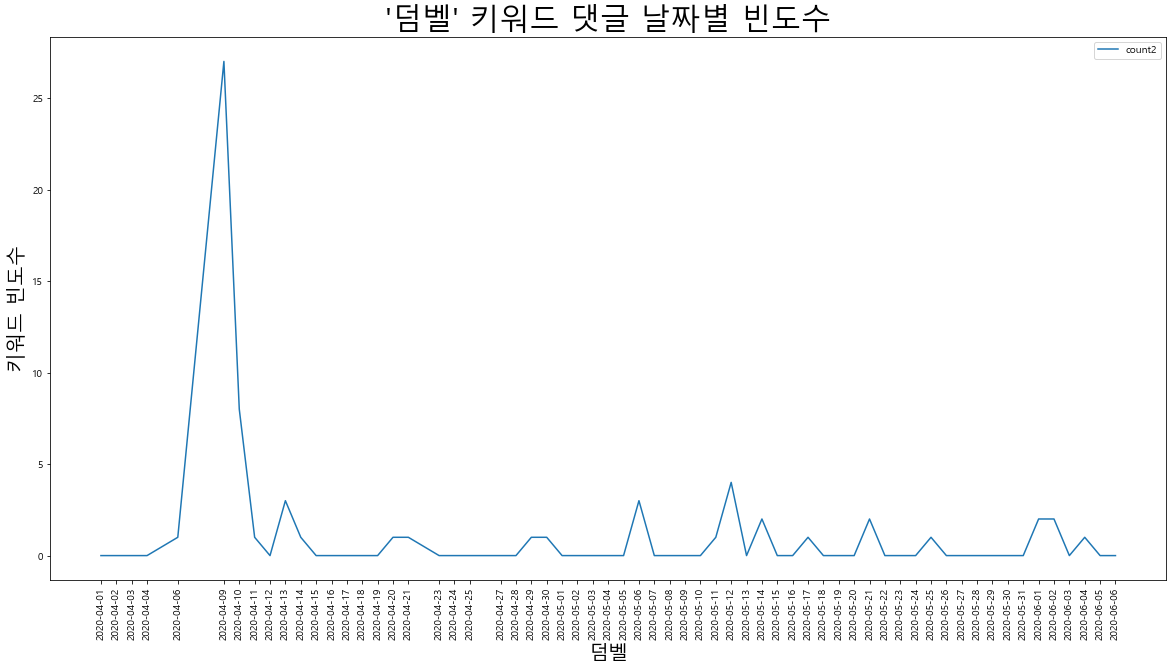

In [41]:
# ['[\'2019. 12. 27.\']','[\'2020. 1. 23.\']','[\'2020. 5. 8.\']','[\'2020. 6. 2.\']']
ax = pdf.plot(figsize =(20,10))
ticks = list(pdf.index)
plt.xticks(ticks, rotation = 'vertical')
plt.xlabel('덤벨',size = 20)
plt.ylabel('키워드 빈도수',size = 20)
plt.title('\'덤벨\' 키워드 댓글 날짜별 빈도수',size =30)
# plt.savefig('불닭빈도수.png', dpi=300)